# Method

Things to learn


In [3]:
import pandas as pd

full_data = pd.read_csv("execution_research_assignment_data.csv")
full_data.head()

,DAY,EDGE,EDGE_EUR,VOLUME,GW,LATENCY,SUCCESS
0,0,0.012786,315.176118,29,2,7623,0
1,0,0.006832,87.106944,15,1,32989,0
2,0,0.008274,126.599008,18,1,3911,0
3,0,0.004841,24.688000,6,2,2674,0
4,0,0.000770,11.133152,17,1,27977,0


In [4]:
full_data.dtypes

DAY           int64
EDGE        float64
EDGE_EUR    float64
VOLUME        int64
GW            int64
LATENCY       int64
SUCCESS       int64
dtype: object

In [5]:
full_data.isnull().sum()

DAY         0
EDGE        0
EDGE_EUR    0
VOLUME      0
GW          0
LATENCY     0
SUCCESS     0
dtype: int64

In [6]:
full_data.describe()

,DAY,EDGE,EDGE_EUR,VOLUME,GW,LATENCY,SUCCESS
count,200000.000000,2.000000e+05,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,9.500160,8.611009e-03,164.723481,17.643480,1.852525,32466.958685,0.180080
std,5.774972,6.485390e-03,193.104378,8.662559,1.106785,32310.409354,0.384255
min,0.000000,1.002811e-07,0.000000,0.000000,0.000000,-18821.000000,0.000000
25%,4.000000,3.445867e-03,32.090915,11.000000,1.000000,9542.000000,0.000000
50%,9.000000,7.296920e-03,97.131619,17.000000,2.000000,22957.000000,0.000000
75%,15.000000,1.239463e-02,227.069964,23.000000,3.000000,46715.000000,0.000000
max,19.000000,4.730235e-02,2653.661728,66.000000,3.000000,410920.000000,1.000000


## Orders and Volume

https://optiver.com/explainers/orders-and-the-order-book/

The exchange chooses which orders to execute. 
Investors send orders for a given stock and an Order book is made for it
The Bids are sorted from highest to lowest first and then by time of arrival 
So the market bid price is highest price, and then the order that gets executed is the first one of this price to arrive

Asks sorted lowest and sae thing

Most order books use price-time priority to decide which orders get executed first. Take another look at the order book above. The best buy price is 44.60, so it will be executed first, regardless of when it arrived at the exchange. If two orders come in at the same price, then the order that arrived first will be first in line to get executed.

### Number of orders sent per day
about 10k 

In [7]:
full_data.DAY.value_counts().sort_index().mean() # exactly 10k

10000.0

In [8]:
X = full_data.groupby("DAY").apply(lambda x:x.VOLUME.mean())
X.head()

DAY
0    18.083350
1    17.789641
2    18.041593
3    17.830395
4    17.763990
dtype: float64

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.figure(figsize=(20,8))
avg_survival_byage = full_data[["DAY", "VOLUME"]]#.groupby(['DAY'], as_index=False)
g = sns.barplot(x='DAY', y='VOLUME', data=avg_survival_byage, color="LightSeaGreen")
plt.show()

<Figure size 2000x800 with 1 Axes>

0    29
1    15
2    18
3     6
4    17
Name: VOLUME, dtype: int64


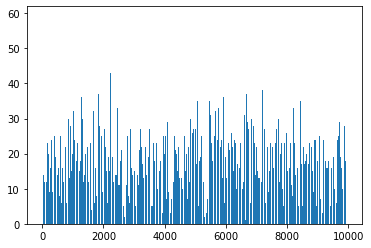

In [10]:
day0 = full_data.loc[full_data.DAY == 0 ]["VOLUME"]
print(day0.head())
x = [i for i in range(len(day0))]
plt.bar(x,day0)
plt.show()

### Volume of each order each day

0    29
1    15
2    18
3     6
4    17
Name: VOLUME, dtype: int64

 DAY 0


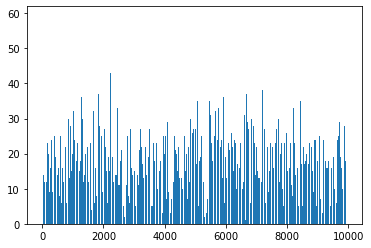

0    15
1    30
2    14
3    10
4    27
Name: VOLUME, dtype: int64

 DAY 1


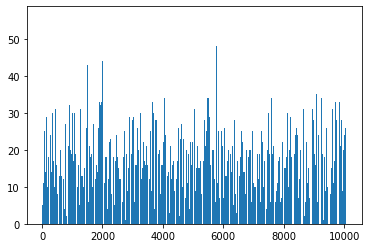

0    17
1    12
2    32
3    16
4     0
Name: VOLUME, dtype: int64

 DAY 2


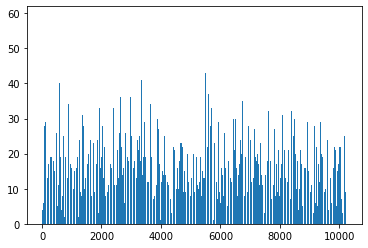

0     4
1     8
2    19
3    18
4    18
Name: VOLUME, dtype: int64

 DAY 3


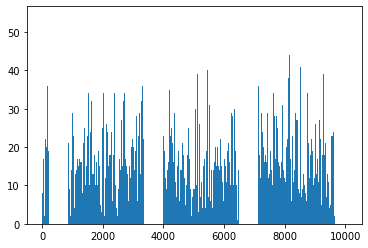

0     6
1     8
2     4
3    21
4    21
Name: VOLUME, dtype: int64

 DAY 4


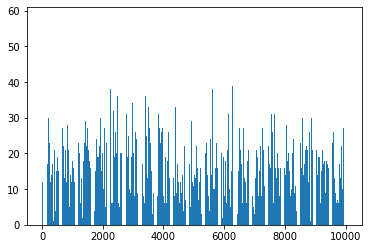

0     2
1     5
2    25
3    21
4    23
Name: VOLUME, dtype: int64

 DAY 5


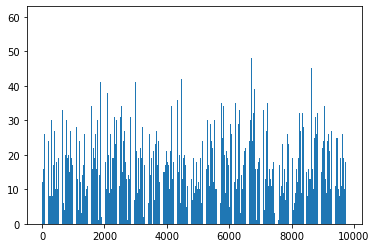

0    28
1    24
2     4
3     2
4    24
Name: VOLUME, dtype: int64

 DAY 6


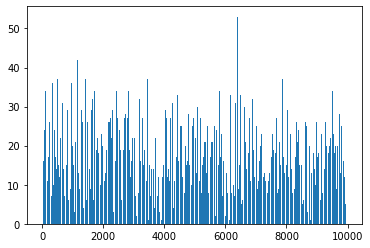

0    23
1     5
2    31
3    27
4    13
Name: VOLUME, dtype: int64

 DAY 7


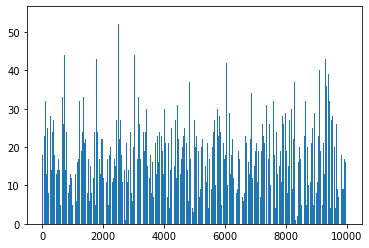

0    20
1    16
2    12
3    27
4    24
Name: VOLUME, dtype: int64

 DAY 8


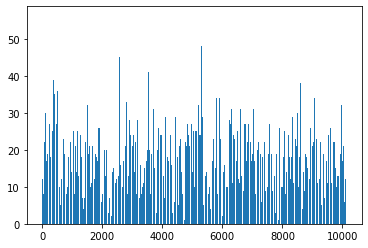

0    26
1     6
2    20
3    20
4    17
Name: VOLUME, dtype: int64

 DAY 9


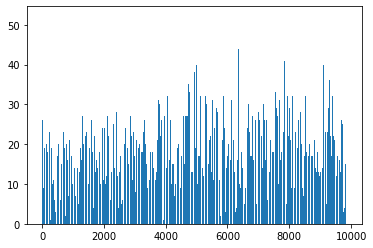

0    21
1    20
2    22
3     2
4    34
Name: VOLUME, dtype: int64

 DAY 10


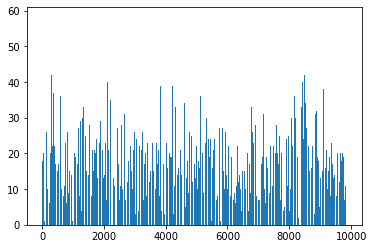

0     9
1    27
2    10
3     7
4     7
Name: VOLUME, dtype: int64

 DAY 11


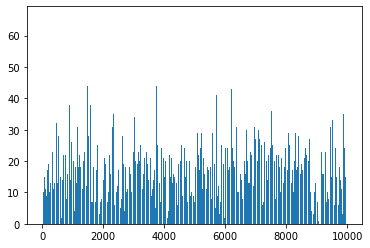

0     8
1    17
2    25
3    15
4    23
Name: VOLUME, dtype: int64

 DAY 12


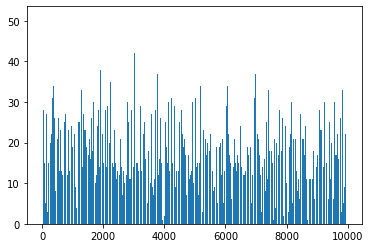

0    33
1    22
2    25
3    22
4    21
Name: VOLUME, dtype: int64

 DAY 13


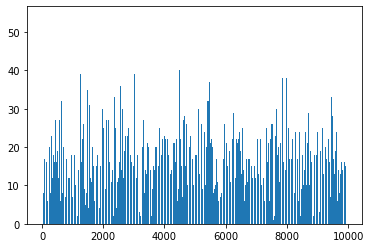

0    21
1    21
2    24
3    18
4    30
Name: VOLUME, dtype: int64

 DAY 14


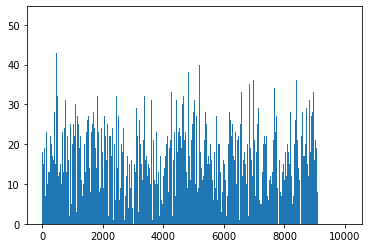

0    27
1    27
2    15
3    15
4    18
Name: VOLUME, dtype: int64

 DAY 15


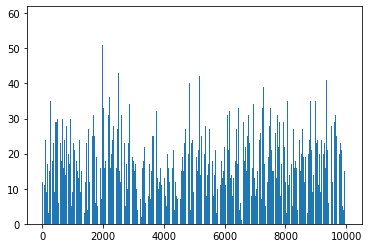

0    11
1    20
2    19
3    22
4    20
Name: VOLUME, dtype: int64

 DAY 16


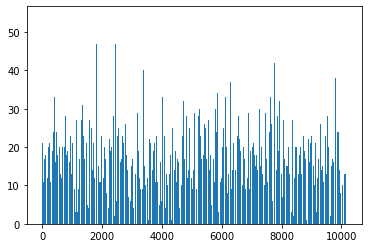

0    20
1     5
2    19
3    37
4    17
Name: VOLUME, dtype: int64

 DAY 17


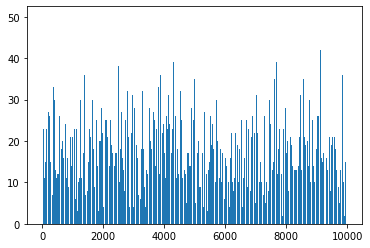

0    23
1    36
2    19
3    24
4    27
Name: VOLUME, dtype: int64

 DAY 18


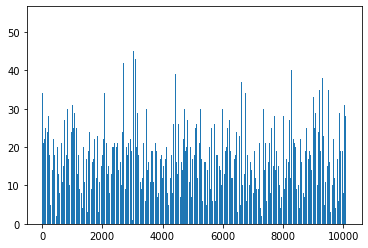

0     1
1    16
2    18
3     9
4    31
Name: VOLUME, dtype: int64

 DAY 19


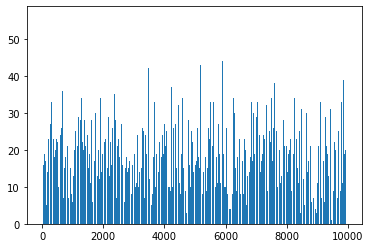

In [11]:
for j in range(20):
    day = full_data.loc[full_data.DAY == j ]["VOLUME"]
    day = day.reset_index(drop = True)
    print(day.head())
    print("\n DAY {}".format(j))
    x = [i for i in range(len(day))]
    plt.bar(x,day)
    plt.show()

26
DAY 3
0     4
1     8
2    19
3    18
4    18
Name: VOLUME, dtype: int64


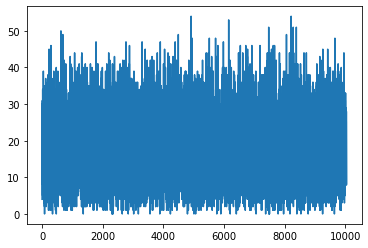

0

In [12]:
print(day.iloc[3850])
j = 3
day = full_data.loc[full_data.DAY == j ]["VOLUME"]
#day = pd.DataFrame([day], index=False)
day = day.reset_index(drop = True)

#for i in range(len(day)):
#    if day.iloc[i] > 10:
 #       day.iloc[i] = 0
#day = day.loc[day <= 10]

print("DAY {}".format(j))
print(day.head())
x = [i for i in range(len(day))]
plt.plot(day)
plt.show()
day.isnull().sum()

### Order volume density 

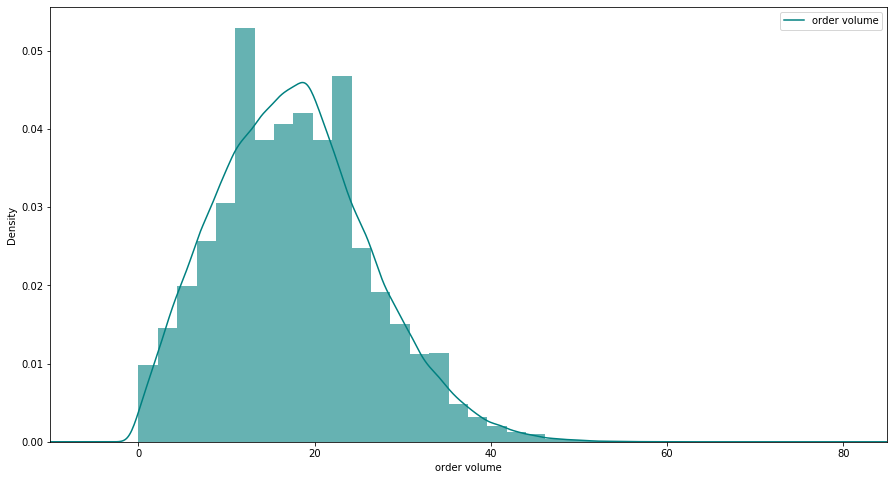

In [13]:
plt.figure(figsize=(15,8))

ax = full_data["VOLUME"].hist(bins=30, density=True, stacked=True, color='teal', alpha=0.6)
full_data["VOLUME"].plot(kind='density', color='teal')
ax.legend([ 'order volume'])
ax.set(xlabel='order volume')
plt.xlim(-10,85)
plt.show()

### Zero Volume Orders

In [14]:
zero_orders = full_data.loc[full_data.VOLUME <= 0]
print(len(zero_orders))
print(full_data.shape)
print(zero_orders[["EDGE","SUCCESS"]].describe())


750
(200000, 7)
               EDGE     SUCCESS
count  7.500000e+02  750.000000
mean   4.946968e-04    0.297333
std    2.974240e-04    0.457390
min    8.474882e-07    0.000000
25%    2.258575e-04    0.000000
50%    4.878417e-04    0.000000
75%    7.597582e-04    1.000000
max    9.998234e-04    1.000000


#### Volume Box Plots

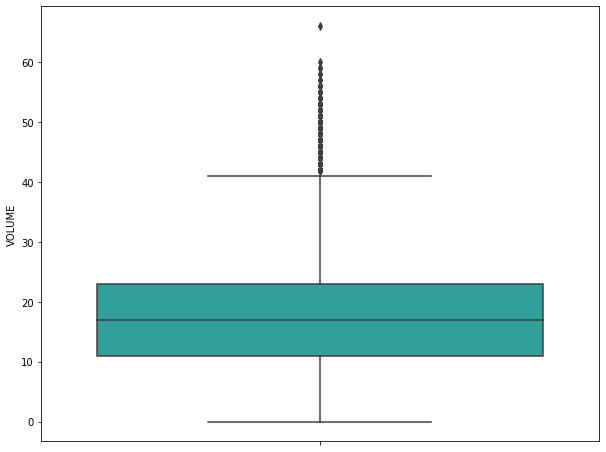

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.figure(figsize=(10,8))
avg_survival_byage = full_data[[ "VOLUME"]]#.groupby(['DAY'], as_index=False)
g = sns.boxplot( y='VOLUME', data=avg_survival_byage, color="LightSeaGreen")
# a lot of outliers
plt.show()

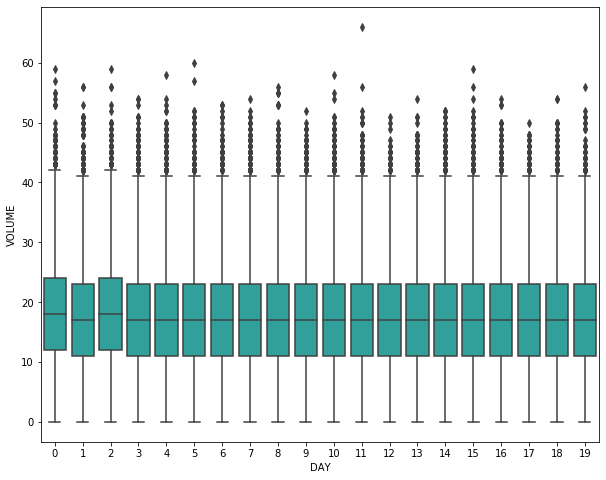

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.figure(figsize=(10,8))
avg_survival_byage = full_data[[ "DAY","VOLUME"]]#.groupby(['DAY'], as_index=False)
g = sns.boxplot(x = "DAY" ,y='VOLUME', data=avg_survival_byage, color="LightSeaGreen")
# a lot of outliers
plt.show()

## EDGE and EDGE_EURO


### Averages

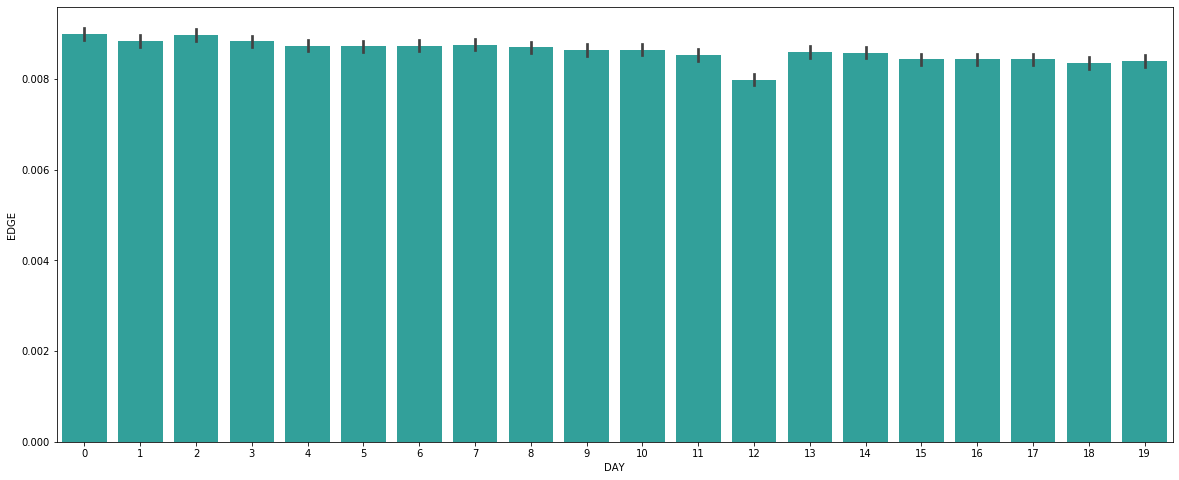

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.figure(figsize=(20,8))
avg_survival_byage = full_data[["DAY", "EDGE"]]#.groupby(['DAY'], as_index=False)
g = sns.barplot(x='DAY', y='EDGE', data=avg_survival_byage, color="LightSeaGreen")
plt.show()

DAY
12    0.007976
18    0.008339
19    0.008397
16    0.008428
15    0.008431
17    0.008432
11    0.008523
14    0.008578
13    0.008598
9     0.008633
10    0.008642
8     0.008696
5     0.008713
4     0.008728
6     0.008732
7     0.008748
3     0.008827
1     0.008839
2     0.008972
0     0.008983
dtype: float64

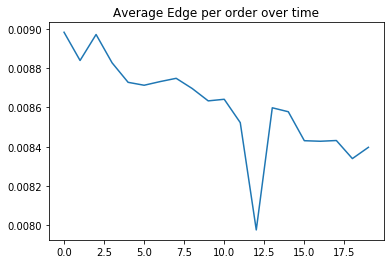

In [18]:
edge_day = full_data.groupby("DAY").apply(lambda x:x.EDGE.mean())
edge_day.head()
x = [i for i in range(20)]
#plt.bar(x,X)
plt.plot(edge_day)
plt.title("Average Edge per order over time")
edge_day.sort_values(ascending=True)

DAY
12    146.150951
18    156.177169
19    158.304213
17    159.070784
16    159.101927
15    160.373430
11    162.654845
14    163.682405
13    164.270154
9     165.452694
10    165.738478
5     167.100395
8     167.186297
6     167.304192
4     168.166949
7     169.500427
1     171.143919
3     171.457394
2     175.253866
0     176.235769
dtype: float64

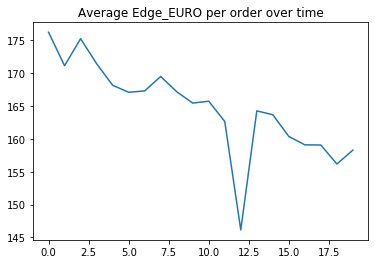

In [19]:
edge_day = full_data.groupby("DAY").apply(lambda x:x.EDGE_EUR.mean())
X.head()
x = [i for i in range(20)]
#plt.bar(x,edge_day)
plt.plot(edge_day)
plt.title("Average Edge_EURO per order over time")
edge_day.sort_values(ascending=True)

### Edge Over time

DAys average is 0: 0.008983104753759812
DAys average is 1: 0.008839247014419654
DAys average is 2: 0.008971617409389766
DAys average is 3: 0.008827212281265208
DAys average is 4: 0.008727951554729893
DAys average is 5: 0.008713098307511182
DAys average is 6: 0.008731767571108492
DAys average is 7: 0.00874837624503239
DAys average is 8: 0.008696453272660332
DAys average is 9: 0.008633469501394162
DAys average is 10: 0.008641630879114428
DAys average is 11: 0.008522716973288696
DAys average is 12: 0.00797608232232647
DAys average is 13: 0.008598251455882151
DAys average is 14: 0.008578095522344708
DAys average is 15: 0.008430562459563766
DAys average is 16: 0.0084277705869795
DAys average is 17: 0.008431510858422501
DAys average is 18:

 0.008339451612691465
DAys average is 19: 0.008396889056895384


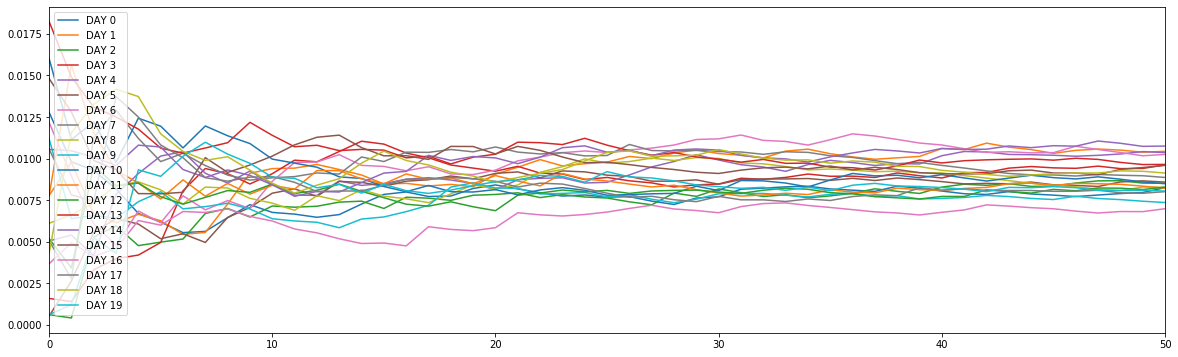

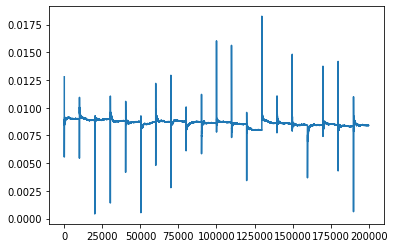

In [20]:
avg_edge_daily = []
avg_edge_overall = []
avg_edge_overall_comb = [] 
day = 0
plt.figure(figsize=(20,6))
for day in range(20):
    sum_edge = 0
    num = 1
    X = full_data.loc[full_data.DAY == day].EDGE
    for i in X:
        sum_edge += i
        curr_val = sum_edge / num
        avg_edge_daily.append(curr_val)
        num+=1

    avg_edge_overall.extend(avg_edge_daily)
    plt.plot(avg_edge_daily, label = "DAY %s"%day )
    print("DAys average is %s:"%day,avg_edge_daily[-1])
    day += 1
    avg_edge_daily = []



plt.xlim(0,50)
plt.legend()
plt.show()

plt.plot(avg_edge_overall)
plt.show()


### Edge over time split

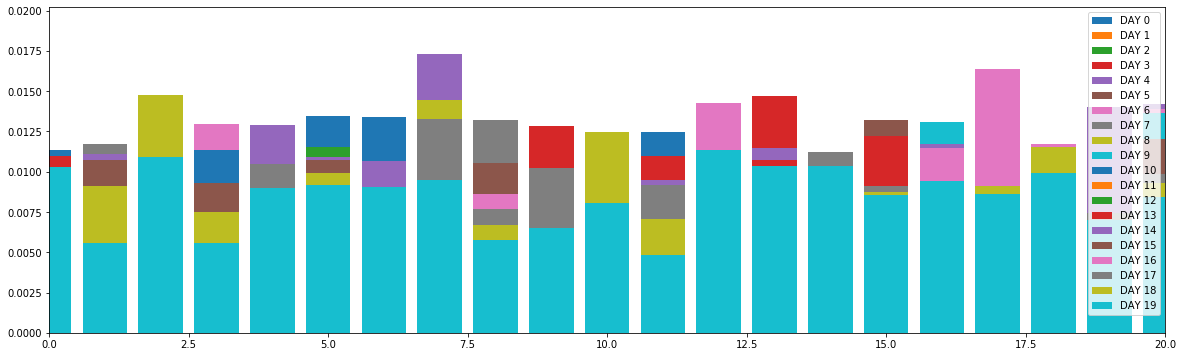

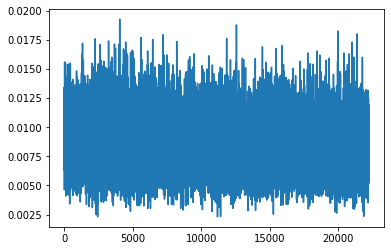

In [21]:
avg_edge_min = []
avg_edge_overall = []
day = 0
plt.figure(figsize=(20,6))
for day in range(20):
    sum_edge = 0
    num = 1
    X = full_data.loc[full_data.DAY == day].EDGE
    counter = 0
    for i in X:
        sum_edge += i
        curr_val = sum_edge / num
        num+=1
        if num == 10:
            avg_edge_min.append(curr_val)
            num = 1
            sum_edge = 0
            


    avg_edge_overall.extend(avg_edge_min)

    plt.bar( [i for i in range(len(avg_edge_min))],avg_edge_min, label = "DAY %s"%day )
    #print("Mins average is %s:"%day,avg_edge_[-1])
    day += 1
    avg_edge_min = []



plt.xlim(0,20)
plt.legend()
plt.show()

plt.plot(avg_edge_overall)
plt.show()
 

### EDGE vs Success Split

In [22]:
# Split latency into groups
edge_euro_range = full_data.EDGE_EUR.max() - full_data.EDGE_EUR.min()
num_points = 3
bucket_size = edge_euro_range / num_points
print(bucket_size)
buckets = [full_data.EDGE_EUR.min() + i*bucket_size for i in range(num_points+1)]

split_edge_euro = pd.cut(full_data.EDGE_EUR, bins = buckets, include_lowest= True, labels=['low', 'mid', 'high'])

X = full_data.copy()
X["Split_Edge_euro"] = split_edge_euro
print(X.head())

884.5539094024081
   DAY      EDGE    EDGE_EUR  VOLUME  GW  LATENCY  SUCCESS Split_Edge_euro
0    0  0.012786  315.176118      29   2     7623        0             low
1    0  0.006832   87.106944      15   1    32989        0             low
2    0  0.008274  126.599008      18   1     3911        0             low
3    0  0.004841   24.688000       6   2     2674        0             low
4    0  0.000770   11.133152      17   1    27977        0             low


## Latency

30019.464764165434

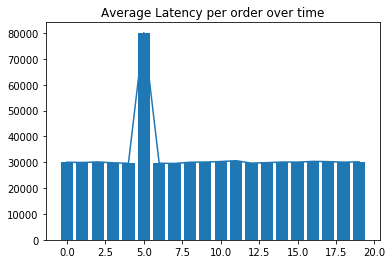

In [23]:
edge_day = full_data.groupby("DAY").apply(lambda x:x.LATENCY.mean())
x = [i for i in range(20)]
plt.bar(x,edge_day)
plt.plot(edge_day)
plt.title("Average Latency per order over time")

edge_day.sort_values(ascending=False, inplace=True)
edge_day.iloc[0]
#edge_day.pop(0)  # after re ordering index

edge_day.drop(edge_day.idxmax(), inplace=True)
edge_day.head()
edge_day.mean() # avearge latency

### Latency over time

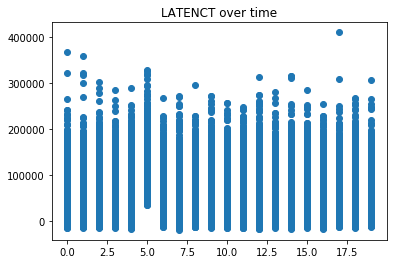

In [24]:
latency_time = full_data.LATENCY
time = full_data.DAY
plt.scatter(time, latency_time)
plt.title("LATENCT over time")
plt.show()
# latency is noisy?

### LAtency Box plots


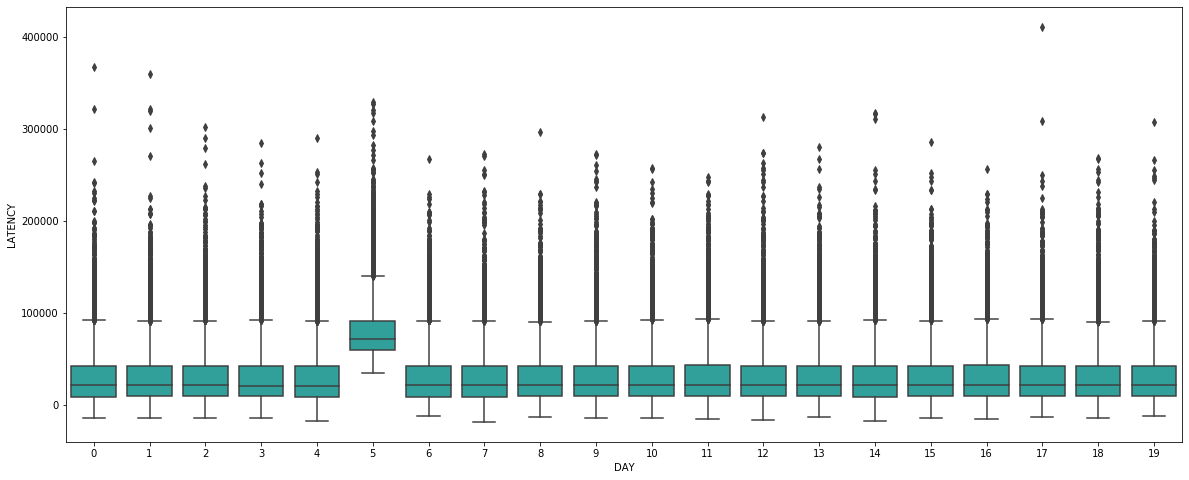

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.figure(figsize=(20,8))
avg_survival_byage = full_data[["DAY", "LATENCY"]]#.groupby(['DAY'], as_index=False)
g = sns.boxplot(x='DAY', y='LATENCY', data=avg_survival_byage, color="LightSeaGreen")
# a lot of outliers
plt.show()

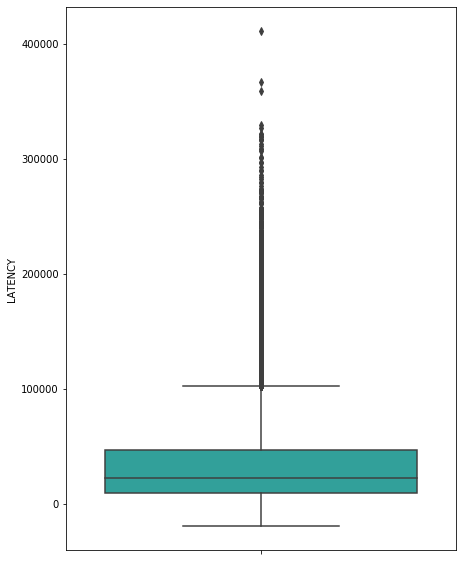

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.figure(figsize=(7,10))
avg_survival_byage = full_data[[ "LATENCY"]]#.groupby(['DAY'], as_index=False)
g = sns.boxplot( y='LATENCY', data=avg_survival_byage, color="LightSeaGreen")
# a lot of outliers
plt.show()

### latency Density Plot

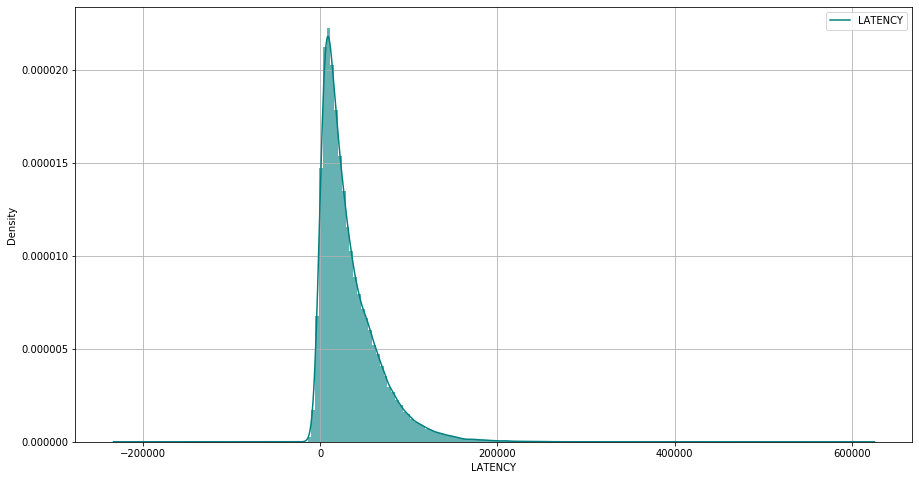

In [27]:
plt.figure(figsize=(15,8))

ax = full_data["LATENCY"].hist(bins=100, density=True, stacked=True, color='teal', alpha=0.6)
full_data["LATENCY"].plot(kind='density', color='teal')
ax.legend([ 'LATENCY'])
ax.set(xlabel='LATENCY')
#plt.xlim(-40000,700000, )
#plt.xticks(np.arange(min(full_data["LATENCY"]), max(full_data["LATENCY"])+1, 100.0))
plt.grid()
plt.show()
#FULL

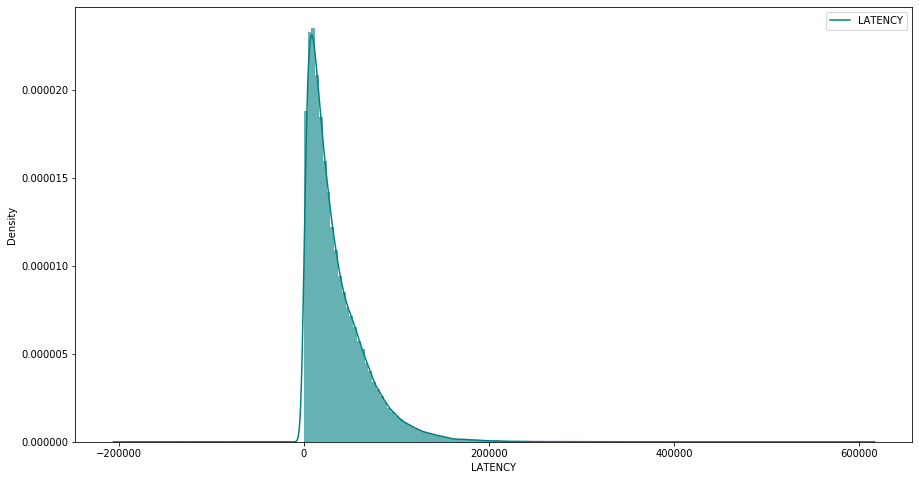

In [28]:
plt.figure(figsize=(15,8))

pos_laten = full_data.loc[full_data.LATENCY > 0 ]

ax = pos_laten["LATENCY"].hist(bins=100, density=True, stacked=True, color='teal', alpha=0.6)
pos_laten["LATENCY"].plot(kind='density', color='teal')
ax.legend([ 'LATENCY'])
ax.set(xlabel='LATENCY')
#plt.xlim(-1, 700000)
plt.show()

### Order Vol vs Laten

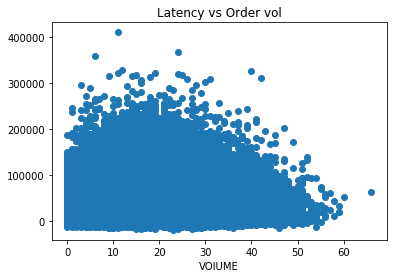

In [29]:
laten = full_data.LATENCY
vol = full_data.VOLUME
plt.scatter(vol, laten)
plt.title("Latency vs Order vol")
plt.xlabel("VOlUME")
plt.show()

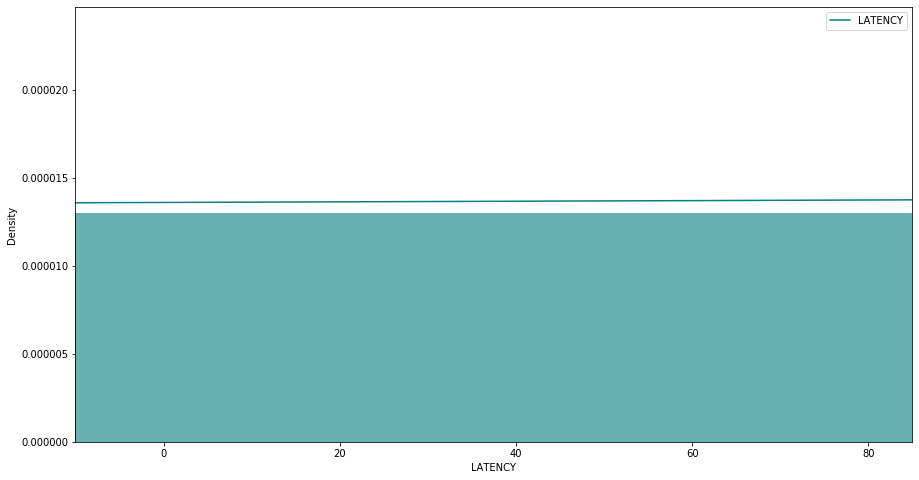

In [30]:
plt.figure(figsize=(15,8))

ax = full_data["LATENCY"].hist(bins=2000, density=True, stacked=True, color='teal', alpha=0.6)
full_data["LATENCY"].plot(kind='density', color='teal')
ax.legend([ 'LATENCY'])
ax.set(xlabel='LATENCY')
plt.xlim(-10,85)
plt.show()

### Lanten vs Edge euro

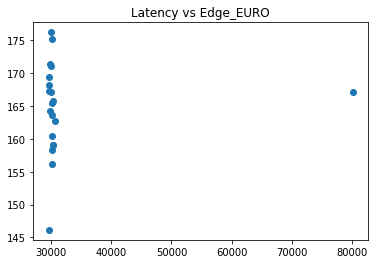

DAY
0     30020.078317
1     29945.177019
2     30142.790080
3     29810.464197
4     29615.556409
5     80165.139842
6     29642.221297
7     29558.145573
8     30034.573826
9     30096.537415
10    30302.489187
11    30623.705104
12    29673.306750
13    29865.644882
14    30100.342957
15    30075.478413
16    30354.053004
17    30264.427970
18    30057.962794
19    30186.875327
dtype: float64


In [31]:
latency_av = full_data.groupby("DAY").apply(lambda x:x.LATENCY.mean()).sort_index()
edge_euro_av = full_data.groupby("DAY").apply(lambda x:x.EDGE_EUR.mean()).sort_index()
plt.scatter(latency_av, edge_euro_av)
plt.title("Latency vs Edge_EURO")
plt.show()
print(latency_av)
# Latency constant for edge euro = > Average

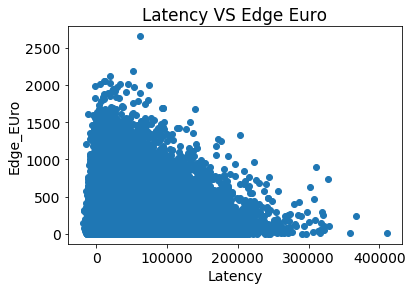

In [96]:
laten = full_data.LATENCY
edge_eu = full_data.EDGE_EUR
plt.scatter(laten, edge_eu)
plt.title("Latency VS Edge Euro")
plt.xlabel("Latency")
plt.ylabel("Edge_EUro")
plt.show()


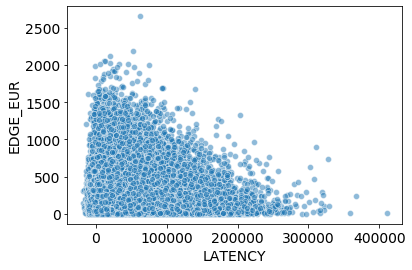

In [97]:
sns.scatterplot(laten,edge_eu, alpha=0.5) # makes dots more transulsent

Application decision making
This area doesn't strictly belong under the umbrella of "low-latency", rather it is the ability of the trading firm to take advantage of High Performance Computing technologies to process data quickly. However, it is included for completeness.

Processing by APIs
Processing by Applications
Propagation between internal systems
Network processing/bandwidth/packet size/propagation between internal systems

### Anomolies

In [159]:
neg_latency = full_data.loc[full_data.LATENCY<= 0]
print(neg_latency.shape)
print(full_data.shape)
print(neg_latency.head())

(11370, 7)
(200000, 7)
     DAY      EDGE    EDGE_EUR  VOLUME  GW  LATENCY  SUCCESS
44     0  0.001463   17.404529      14   0    -1526        0
74     0  0.004483   80.019453      21   3    -6041        0
90     0  0.013947  165.964759      14   3     -764        0
113    0  0.003954   30.246148       9   3    -3738        1
118    0  0.002704   11.493927       5   0    -3036        0


#### Negative Latency

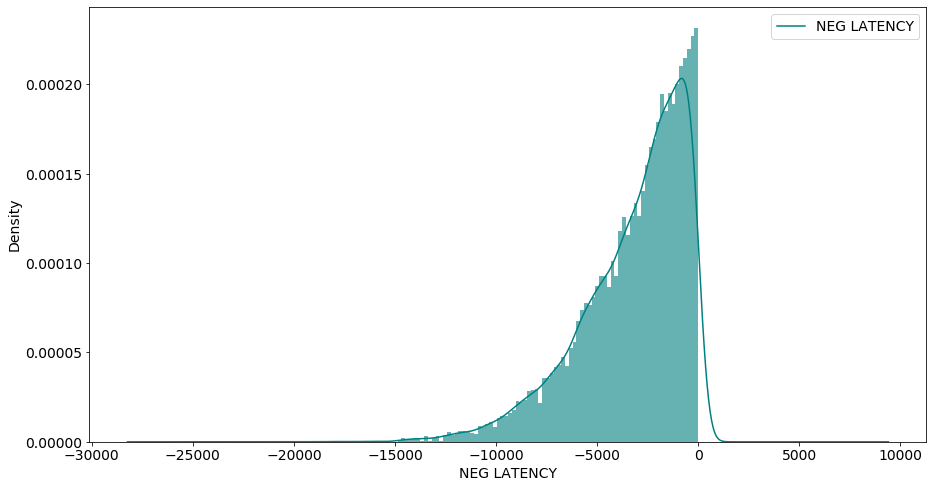

In [179]:
plt.figure(figsize=(15,8))

ax = neg_latency["LATENCY"].hist(bins=100, density=True, stacked=True, color='teal', alpha=0.6)
neg_latency["LATENCY"].plot(kind='density', color='teal')
ax.legend([ 'NEG LATENCY'])
ax.set(xlabel='NEG LATENCY')
#plt.xlim(-40000,85)
plt.show()

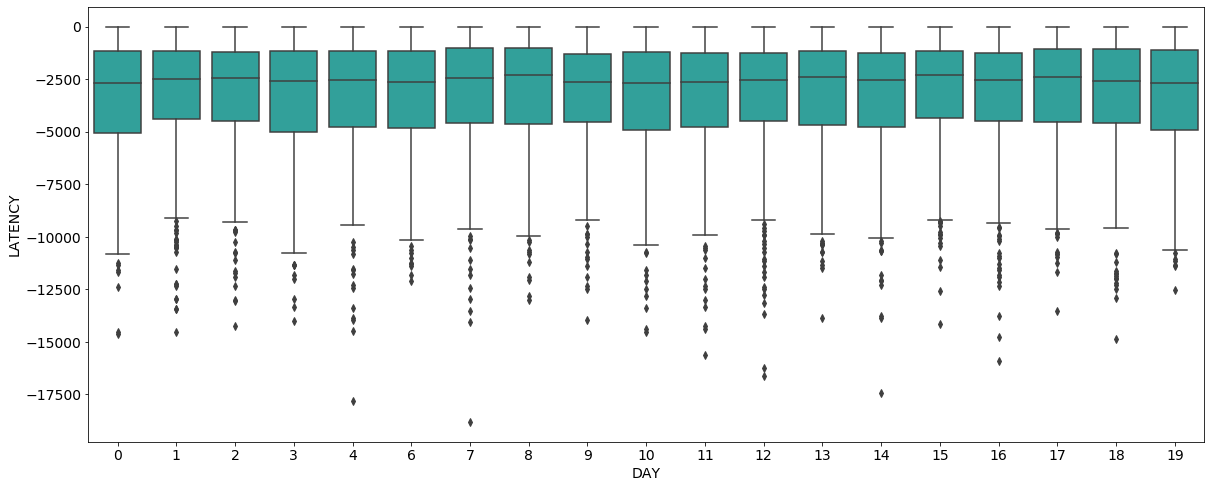

In [180]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.figure(figsize=(20,8))
avg_survival_byage = neg_latency
g = sns.boxplot(x='DAY', y='LATENCY', data=neg_latency, color="LightSeaGreen")
# a lot of outliers
plt.show()

### Latency Analysis

In [157]:
latency  = full_data.LATENCY
latency.describe()

count    200000.000000
mean      32466.958685
std       32310.409354
min      -18821.000000
25%        9542.000000
50%       22957.000000
75%       46715.000000
max      410920.000000
Name: LATENCY, dtype: float64

## Gateway

In [251]:
full_data.GW.describe()

count    200000.000000
mean          1.852525
std           1.106785
min           0.000000
25%           1.000000
50%           2.000000
75%           3.000000
max           3.000000
Name: GW, dtype: float64

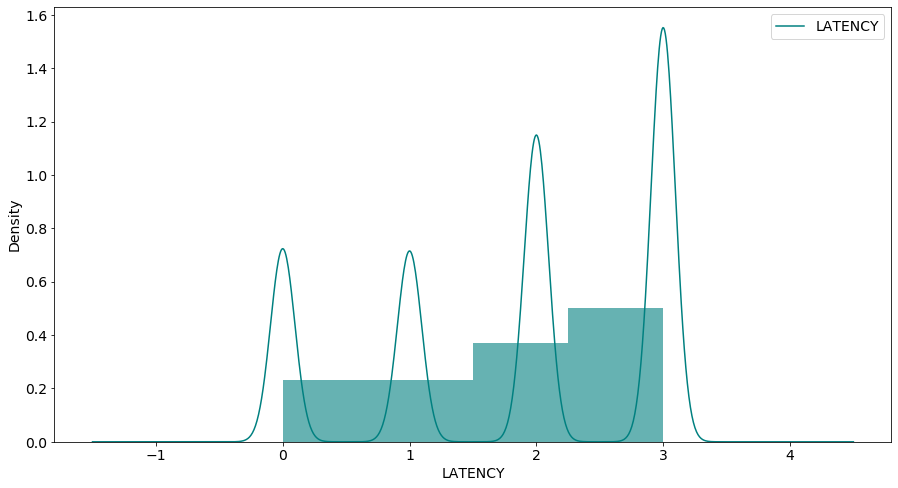

In [253]:
plt.figure(figsize=(15,8))

ax = full_data["GW"].hist(bins=4, density=True, stacked=True, color='teal', alpha=0.6)
full_data["GW"].plot(kind='density', color='teal')
ax.legend([ 'LATENCY'])
ax.set(xlabel='LATENCY')
#plt.xlim(-40000,700000, )
plt.show()
#FULL

### Number of orders in each gateway

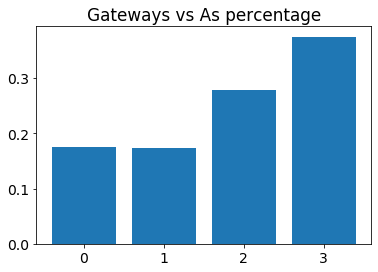

3    0.374835
2    0.277640
0    0.174785
1    0.172740
Name: GW, dtype: float64
0.9999999999999999


In [307]:
X = full_data.GW.value_counts() / len(full_data)
y = [i for i in range(len(X))]
plt.bar(X.index,X)
plt.title("Gateways vs As percentage")
plt.show()
print(X)
check = 0
for i in X:
    check += i
print(check)


### gateway and success

In [314]:
gateway = full_data.groupby("GW").SUCCESS.agg([len])
gateway.head()

,len
GW,
0,34957
1,34548
2,55528
3,74967


In [308]:
gateway = full_data.groupby("GW").apply(lambda x: x.SUCCESS.value_counts())
new_data = (gateway.iloc[:,1]) / ((gateway.iloc[:,1])+ (gateway.iloc[:,0]))
gateway.insert(2, "%", new_data,True)
gateway

SUCCESS,0,1,%
GW,,,
0,28789,6168,0.176445
1,27542,7006,0.202790
2,43603,11925,0.214757
3,64050,10917,0.145624


Text(0.5, 1.0, 'Gateways % of success')

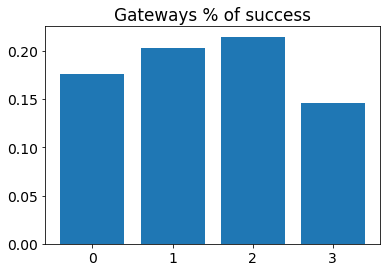

In [311]:
X = gateway.iloc[:,2]
plt.bar(gateway.index, X)
plt.title("Gateways % of success")

### Gateway vs Volume of orders

In [312]:
gateway = full_data.groupby("GW").apply(lambda x: x.VOLUME.mean())
gateway

GW
0    15.731470
1    15.793302
2    13.778940
3    22.250150
dtype: float64

Text(0.5, 1.0, 'gateways and average order volume')

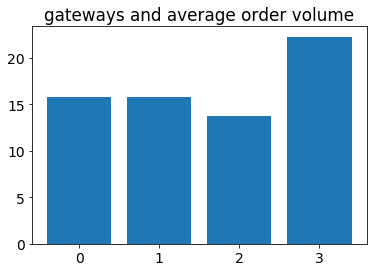

In [313]:
X = gateway
plt.bar(gateway.index, X)
plt.title("gateways and average order volume")

### gateway vs Edge

GW
0    0.006713
1    0.006719
2    0.004748
3    0.013230
dtype: float64


Text(0.5, 1.0, 'gateways and average EDGE')

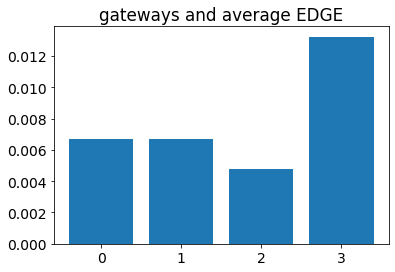

In [318]:
gateway = full_data.groupby("GW").apply(lambda x: x.EDGE.mean())
print(gateway)
plt.bar(gateway.index, gateway)
plt.title("gateways and average EDGE")

### Gateway vs EDGE_EURO

GW
0    100.623810
1    101.266746
2     68.361923
3    295.231572
dtype: float64


Text(0.5, 1.0, 'gateways and average EDGE_EURO')

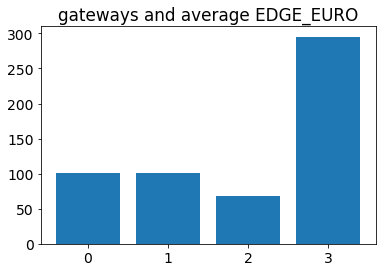

In [319]:
gateway = full_data.groupby("GW").apply(lambda x: x.EDGE_EUR.mean())
print(gateway)
plt.bar(gateway.index, gateway)
plt.title("gateways and average EDGE_EURO")

In [275]:
gateway.describe()

SUCCESS,0,1
count,4.000000,4.00000
mean,40996.000000,9004.00000
std,17012.782743,2841.75474
min,27542.000000,6168.00000
25%,28477.250000,6796.50000
50%,36196.000000,8961.50000
75%,48714.750000,11169.00000
max,64050.000000,11925.00000


In [243]:
gateway = full_data.groupby("GW").apply(lambda x: sum(x.SUCCESS ==0))
gateway

GW
0    28789
1    27542
2    43603
3    64050
dtype: int64

In [250]:
gw_succ = full_data.groupby("GW").apply(lambda x: sum(x.SUCCESS ==1))
gw_fail = full_data.groupby("GW").apply(lambda x: sum(x.SUCCESS ==0))
gw_succ["%_sucess"] = gw_succ / (gw_succ+gw_fail)
gw_succ.head()

GW
0                                                        6168
1                                                        7006
2                                                       11925
3                                                       10917
%_sucess    GW
0    0.176445
1    0.202790
2    0.214757
3...
dtype: object

### Gateway Vs EDGE VS SUCCESS

GW
0    100.623810
1    101.266746
2     68.361923
3    295.231572
dtype: float64


Text(0.5, 1.0, 'gateways and average EDGE')

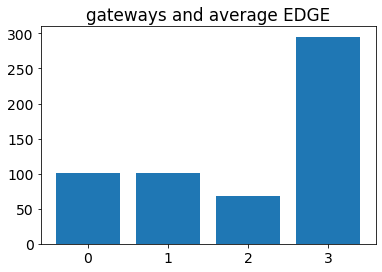

In [569]:

gateway_edge = full_data.groupby("GW").apply(lambda x: x.EDGE.mean())
print(gateway)
plt.bar(gateway.index, gateway)
plt.title("gateways and average EDGE")

0.00946044956305975
Split_Edge
1.002810867125562e-07 - 0.009460549844146463    0.189877
0.009460549844146463 - 0.018920999407206214     0.138030
0.018920999407206214 - 0.028381448970265965          NaN
0.028381448970265965 - 0.037841898533325716          NaN
0.037841898533325716 - 0.04730234809638546           NaN
Name: SUCCESS, dtype: float64
Split_Edge
1.002810867125562e-07 - 0.009460549844146463    0.220970
0.009460549844146463 - 0.018920999407206214     0.151822
0.018920999407206214 - 0.028381448970265965          NaN
0.028381448970265965 - 0.037841898533325716          NaN
0.037841898533325716 - 0.04730234809638546           NaN
Name: SUCCESS, dtype: float64
Split_Edge
1.002810867125562e-07 - 0.009460549844146463    0.229129
0.009460549844146463 - 0.018920999407206214     0.141429
0.018920999407206214 - 0.028381448970265965          NaN
0.028381448970265965 - 0.037841898533325716          NaN
0.037841898533325716 - 0.04730234809638546           NaN
Name: SUCCESS, dtype: float64
Sp

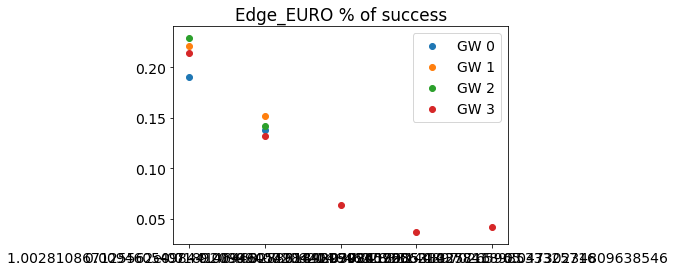

In [597]:

edge_euro_range = full_data.EDGE.max() - full_data.EDGE.min()
num_points = 5
bucket_size = edge_euro_range / num_points
print(bucket_size)
buckets = [full_data.EDGE.min() + i*bucket_size for i in range(num_points+1)]


label  = ["{}".format(buckets[i]) + " - " + "{}".format(buckets[i+1])  for i in range(len(buckets) - 1)]
split_edge_euro = pd.cut(full_data.EDGE, bins = buckets, include_lowest= True, labels=label)
#print("\n CHECK \n",split_edge_euro.value_counts())

X = full_data.copy()
X["Split_Edge"] = split_edge_euro
#print(X.head())



#gateway_edge = X.groupby(["GW", "Split_Edge"]).apply(lambda x: x.SUCCESS.value_counts())

#print(gateway_edge.index)#.iloc[0])
for i in range(4):
    edge_euro_split_success = X.loc[(X.SUCCESS == 1) & (X.GW == i)].groupby("Split_Edge").SUCCESS.count() 
    edge_euro_split_fail = X.loc[(X.SUCCESS == 0) & (X.GW == i)].groupby("Split_Edge").SUCCESS.count() 
    new_data = edge_euro_split_success / (edge_euro_split_fail + edge_euro_split_success)
    print(new_data)
    x = new_data
    plt.scatter(edge_euro_split_success.index, x , label = "GW {}".format(i))
plt.legend()
plt.title("Edge_EURO % of success")
plt.show()

#### Gate Usage Overtime

#### successs by gate  and edge over time

0.015767415938432918


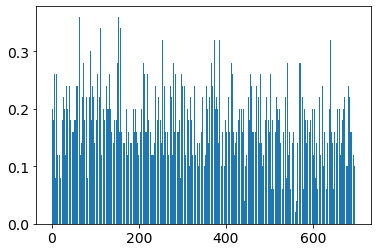

0


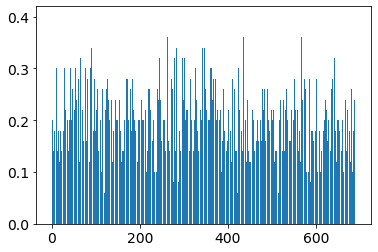

1


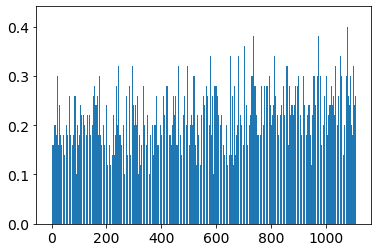

2


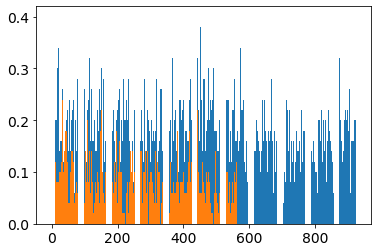

3


In [656]:
edge_euro_range = full_data.EDGE.max() - full_data.EDGE.min()
num_points = 3
bucket_size = edge_euro_range / num_points
print(bucket_size)
buckets = [full_data.EDGE.min() + i*bucket_size for i in range(num_points+1)]


label  = ["{}".format(buckets[i]) + " - " + "{}".format(buckets[i+1])  for i in range(len(buckets) - 1)]
split_edge_euro = pd.cut(full_data.EDGE, bins = buckets, include_lowest= True, labels=label)
#print("\n CHECK \n",split_edge_euro.value_counts())

X = full_data.copy()
X["Split_Edge"] = split_edge_euro

for GW in range(4):


    for j in range(len(label)):

        reduced_data = X.loc[(X.Split_Edge == label[j]) & (X.GW == GW)]
        sample_size = 50
        success_overtime = []
        counter = 1
        temp_succ = 0
        indexer = []
        for i in range(len(reduced_data.SUCCESS)):
            if counter == 0:
                indexer.append(reduced_data.index[i])

            if reduced_data.SUCCESS.iloc[i] == 1:
                temp_succ += 1
            counter +=1

            if counter == sample_size: #and temp_succ/counter:
                success_overtime.append(temp_succ/counter)
                counter = 0
                temp_succ = 0
                
        if temp_succ != 0:
            success_overtime.append(temp_succ/counter)
            indexer.append(reduced_data.index[i])

        #print(len(indexer), len(success_overtime))
        #print(indexer)
        #plt.scatter(indexer, [1 for i in range(len(indexer))])
        plt.bar([x for x in range(len(success_overtime))], success_overtime,label = label[j])
#[x for x in range(len(success_overtime))]
    #plt.legend()
    plt.show()
    #plt.xlim(500,900)
    print(GW)
#print("number of occurences", len(success_overtime))



In [643]:


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess
X = reduced_data.to_frame()
X["week"] = X.index.week
X["day"] = X.index.dayofweek
seasonal_plot(X, y='sales', period='week', freq='day');

ModuleNotFoundError: No module named 'statsmodels.tsa.deterministic'

In [631]:
edge_euro_range = full_data.EDGE.max() - full_data.EDGE.min()
num_points = 3
bucket_size = edge_euro_range / num_points
print(bucket_size)
buckets = [full_data.EDGE.min() + i*bucket_size for i in range(num_points+1)]


label  = ["{}".format(buckets[i]) + " - " + "{}".format(buckets[i+1])  for i in range(len(buckets) - 1)]
split_edge_euro = pd.cut(full_data.EDGE, bins = buckets, include_lowest= True, labels=label)
#print("\n CHECK \n",split_edge_euro.value_counts())

X = full_data.copy()
X["Split_Edge"] = split_edge_euro

for i in range(4):
    reduced_GW = X.loc[X.GW == i]
    print("max EDGE_EUR for gate {}:".format(i),reduced_GW.EDGE_EUR.max())

for i in range(4):
    reduced_GW = X.loc[X.GW == i]
    print("max EDGE for gate {}:".format(i),reduced_GW.EDGE.max())
reduced_data.index

0.015767415938432918
max EDGE_EUR for gate 0: 375.97221425476823
max EDGE_EUR for gate 1: 375.71253016145636
max EDGE_EUR for gate 2: 375.65332508374473
max EDGE_EUR for gate 3: 2653.6617282072243
max EDGE for gate 0: 0.013831105806158744
max EDGE for gate 1: 0.013831306458419316
max EDGE for gate 2: 0.013831234096606979
max EDGE for gate 3: 0.04730234809638546


Int64Index([   208,    745,    786,   1193,   1367,   1554,   1654,   2066,
              2265,   2392,
            ...
            195947, 196389, 196605, 197618, 197870, 198359, 198682, 198722,
            199074, 199504],
           dtype='int64', length=670)

### Gate 3 not used 

### Gateway Vs Latency

### Extra Research

This is one of the areas where most delay can be added, due to the distances involved, amount of processing by internal routing engines, hand off between different networks and the sheer amount of data which is being sent, received and processed from various data venues.

Latency is largely a function of the speed of light, which is 299,792,458 meters/second (186,000 miles/second)(671,000,000 miles/hour) in a scientifically controlled environment; this would equate to a latency of 3 microseconds for every kilometer. However, when measuring latency of data we need to account for the fiber optic cable. Although it seems "pure", it is not a vacuum and therefore refraction of light needs to be accounted for. For measuring latency in long-haul networks, the calculated latency is actually 4.9 microseconds for every kilometer. In shorter metro networks, the latency performance rises a bit more due to building risers and cross-connects that can make the latency as high as 5 microseconds per kilometer.

It follows that to calculate latency of a connection, one needs to know the full distance travelled by the fiber, which is rarely a straight line, since it has to traverse geographic contours and obstacles, such as roads and railway tracks, as well as other rights-of-way.

Due to imperfections in the fiber, light degrades as it is transmitted through it. For distances greater than 100 kilometers, either amplifiers or regenerators need to be deployed. Accepted wisdom has it that amplifiers add less latency than regenerators, though in both cases the added latency can be highly variable, which needs to be taken into account. In particular, legacy spans are more likely to make use of higher latency regenerators.

Propagation between the location of the execution venue and the location of the application
Delays in data aggregation networks such as Refinitiv Elektron, Bloomberg, IDC and others
Propagation within internal networks
Processing within internal networks
Processing by internal routing systems
Bandwidth of extranet and internal networks
Message packet sizes
Amount of data being sent and received

https://en.wikipedia.org/wiki/Low_latency_(capital_markets)

## Success

### Success over time

#### general

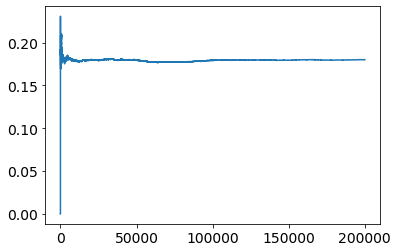

18.008


In [664]:
succ_overtime = []
num_succ, num_fail = 0,0
for i in full_data.SUCCESS:
    if i == 1:
        num_succ += 1
    else:
        num_fail+=1

    curr_val = num_succ / (num_succ + num_fail)
    succ_overtime.append(curr_val)
plt.plot(succ_overtime[:])
plt.show()
print(succ_overtime[-1]*100)

# 18% success over all orders
# stays steady over time


#### By day

DAys average is 0: 17.877994765451984
DAys average is 1: 18.098829132764436
DAys average is 2: 18.131224370240187
DAys average is 3: 17.99621551638283
DAys average is 4: 17.64588528678304
DAys average is 5: 16.586415326298535
DAys average is 6: 17.874347651545563
DAys average is 7: 17.668834417208604
DAys average is 8: 18.456375838926174
DAys average is 9: 18.895319321758556
DAys average is 10: 18.194740582800286
DAys average is 11: 18.12894816003209
DAys average is 12: 18.159903575733228
DAys average is 13: 17.605067363764327
DAys average is 14: 17.799900447984072
DAys average is 15: 18.878672796322206
DAys average is 16: 17.563182220473987
DAys average is 17: 17.56390977443609
DAys average is 18: 18.50385909360776
DAys average is 19: 18.505123568414707


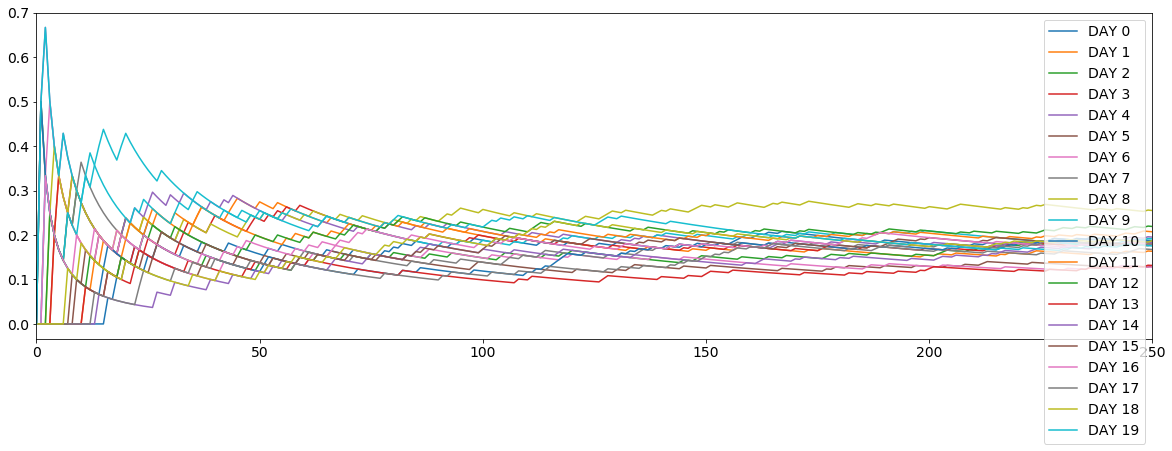

In [553]:
day = 0
plt.figure(figsize=(20,6))
for day in range(20):
    num_succ = 0
    num_fail = 0
    X = full_data.loc[full_data.DAY == day].SUCCESS
    for i in X:
        if i== 1:
                num_succ += 1
        else:
            num_fail+=1

        curr_val = num_succ / (num_succ + num_fail)
        succ_daily.append(curr_val)
        i+=1

    succ_overtime.append(succ_daily)
    plt.plot(succ_daily, label = "DAY %s"%day )
    print("DAys average is %s:"%day,succ_daily[-1]*100)
    day += 1
    succ_daily = []



plt.xlim(0,250)
plt.legend()
plt.show()


The best time of day to buy and sell shares is usually thought to be the first couple of hours of the market opening. The reason for this is that all significant market news for the day is factored into the stock price first thing in the morning. So, when it comes to trading stocks, the early bird often catches the worm.

All this activity often makes the first one or two hours of a day – or even the first 15 minutes – more volatile. As the day progresses and latest macroeconomic developments and market events are already factored into stocks’ prices, trading volumes and volatility flatten out somewhat. This means the opportunities that come with volatility are typically at their highest right after markets open, decreasing as the day goes on (although activity often does pick up in the last hour of a day’s trading session).

### How long does it take to stabilise
#### WHat values should we remove

In [99]:
Success_latency = full_data.groupby("SUCCESS").apply(lambda x:x.LATENCY.mean())
Success_latency

SUCCESS
0    32990.030137
1    30085.368586
dtype: float64

In [ ]:
sns.barplot('LATENCY', 'SUCCESS', data=full_data[["SUCCESS", "LATENCY"]], color="teal")
plt.show()

In [128]:
laten_succ = full_data.groupby("DAY")["SUCCESS"]
laten_succ.head()

#full_data.LATENCY.value_counts()

0         0
1         0
2         0
3         0
4         0
         ..
190046    0
190047    1
190048    1
190049    0
190050    0
Name: SUCCESS, Length: 100, dtype: int64

### Orders and Order vol vs Success

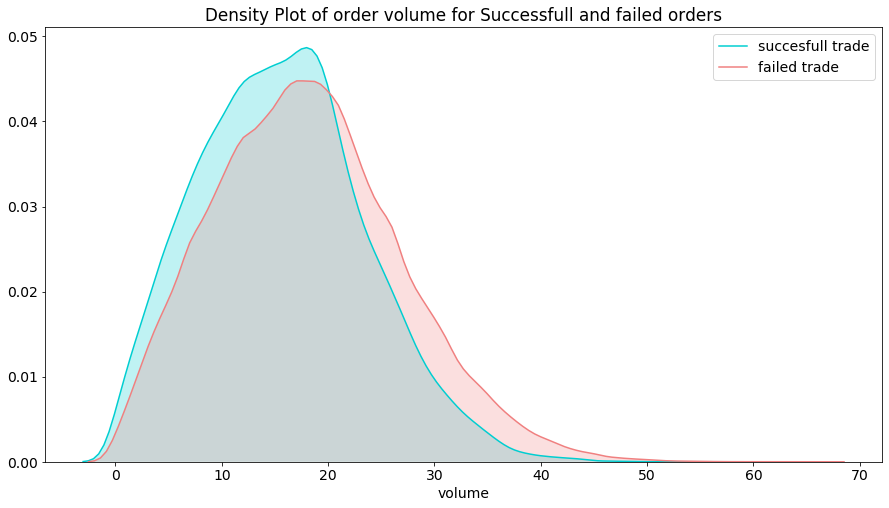

In [186]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(full_data["VOLUME"][full_data.SUCCESS == 1], color="darkturquoise", shade=True)
sns.kdeplot(full_data["VOLUME"][full_data.SUCCESS== 0], color="lightcoral", shade=True)
plt.legend(['succesfull trade', 'failed trade'])
plt.title('Density Plot of order volume for Successfull and failed orders')
ax.set(xlabel='volume')
#plt.xlim(-100,300)
plt.show()

# OF SUCCESSFUL TRADES A HIGHER POWER IS LOWER VOLUME

### Latency vs Success

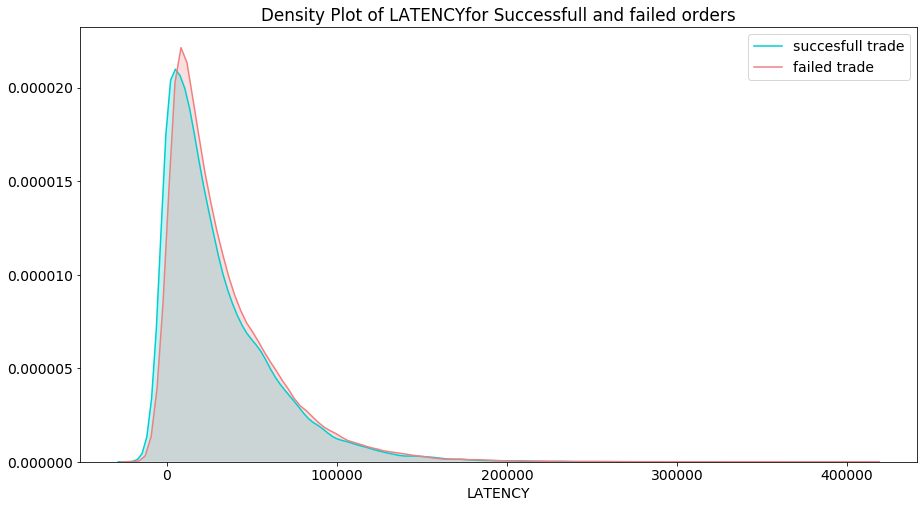

In [187]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(full_data["LATENCY"][full_data.SUCCESS == 1], color="darkturquoise", shade=True)
sns.kdeplot(full_data["LATENCY"][full_data.SUCCESS== 0], color="lightcoral", shade=True)
plt.legend(['succesfull trade', 'failed trade'])
plt.title('Density Plot of LATENCYfor Successfull and failed orders')
ax.set(xlabel='LATENCY')
#plt.xlim(-100,300)
plt.show()

In [191]:
latency = full_data.LATENCY
print(latency.describe())

count    200000.000000
mean      32466.958685
std       32310.409354
min      -18821.000000
25%        9542.000000
50%       22957.000000
75%       46715.000000
max      410920.000000
Name: LATENCY, dtype: float64


#### Split into intervals

Split_Latency_micro
-18.821 - 16.990749999999995               0.198390
16.990749999999995 - 52.802499999999995    0.167787
52.802499999999995 - 88.61425              0.169258
88.61425 - 124.42599999999999              0.164944
124.42599999999999 - 160.23774999999998    0.162271
160.23774999999998 - 196.0495              0.168961
196.0495 - 231.86124999999998              0.158672
231.86124999999998 - 267.67299999999994    0.176471
267.67299999999994 - 303.48474999999996    0.136364
303.48474999999996 - 339.2964999999999     0.071429
339.2964999999999 - 375.10824999999994     0.000000
375.10824999999994 - 410.91999999999996         NaN
Name: SUCCESS, dtype: float64


Text(0.5, 1.0, 'Latency speed % of success')

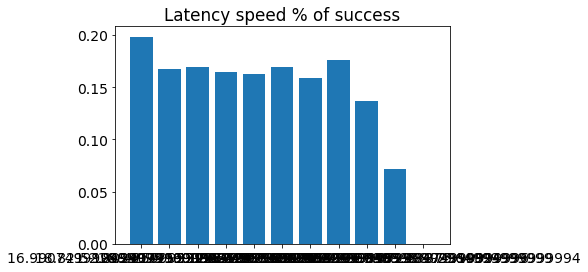

In [482]:
# Split latency into groups
latency_range = (full_data.LATENCY.max() - full_data.LATENCY.min()) * 10**(-3)
num_points = 12
bucket_size = latency_range / num_points



buckets = [(full_data.LATENCY.min() ) * 10**(-3)+ i*bucket_size for i in range(num_points+1)]
label  = ["{}".format(buckets[i]) + " - " + "{}".format(buckets[i+1])  for i in range(len(buckets) - 1)]
L = full_data.LATENCY * (0.001)
split_latency = pd.cut(L, bins = buckets, include_lowest= True, labels=label)

X = full_data.copy()
X["Split_Latency_micro"] = split_latency

#print(X.head())
        

latency_split_success = X.loc[X.SUCCESS == 1].groupby("Split_Latency_micro").SUCCESS.count() 
latency_split_fail = X.loc[X.SUCCESS == 0].groupby("Split_Latency_micro").SUCCESS.count() 


#.apply(lambda x :x.SUCCESS.value_counts())#, axis = 1)
#new_data = (latency_split.iloc[:,1]) / ((latency_split.iloc[:,1])+ (latency_split.iloc[:,0]))
#latency_split.insert(2, "%", new_data,True)
#print(latency_split_success.head())
#print(latency_split_fail.head())
new_data = latency_split_success / (latency_split_fail + latency_split_success)
print(new_data)
x = new_data
plt.bar(latency_split_success.index, x)
plt.title("Latency speed % of success")


#print(latency_split.shape())
#x = latency_split.iloc[:,2]
#plt.bar(latency_split.index, x)
#plt.title("Latency speed % of success")

Up untill 282 micro it is normal, then sharp drop after
Drop off at 17 


#### Once Latency drops, the chance of success now depends on pricing
##### pricing method mentioned in Optiver


#### Splitting latency into labels

In [387]:
# Split latency into groups
latency_range = full_data.LATENCY.max() - full_data.LATENCY.min()
num_points = 3
bucket_size = latency_range / num_points
buckets = [full_data.LATENCY.min() + i*bucket_size for i in range(num_points+1)]
print(buckets[-1])

split_latency = pd.cut(full_data.LATENCY, bins = buckets, include_lowest= True, labels=['low', 'mid', 'high'])

X = full_data.copy()
X["Split_Latency"] = split_latency

print(buckets)
laten_micro = [i * 10**(-3) for i in buckets]
print("groups in mico " , laten_micro)
print(X.head())


410920.0
[-18821.0, 124426.0, 267673.0, 410920.0]
groups in mico  [-18.821, 124.426, 267.673, 410.92]
   DAY      EDGE    EDGE_EUR  VOLUME  GW  LATENCY  SUCCESS Split_Latency
0    0  0.012786  315.176118      29   2     7623        0           low
1    0  0.006832   87.106944      15   1    32989        0           low
2    0  0.008274  126.599008      18   1     3911        0           low
3    0  0.004841   24.688000       6   2     2674        0           low
4    0  0.000770   11.133152      17   1    27977        0           low


SUCCESS             0      1         %
Split_Latency                         
low            160700  35376  0.180420
mid              3249    636  0.163707
high               35      4  0.102564
(3, 3)


Text(0.5, 1.0, 'Latency speed % of success')

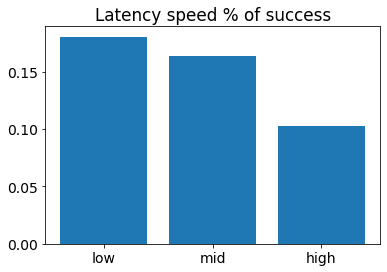

In [388]:
latency_split = X.groupby("Split_Latency").apply(lambda x: x.SUCCESS.value_counts())
new_data = (latency_split.iloc[:,1]) / ((latency_split.iloc[:,1])+ (latency_split.iloc[:,0]))
latency_split.insert(2, "%", new_data,True)
print(latency_split)
print(latency_split.shape)
x = latency_split.iloc[:,2]
plt.bar(latency_split.index, x)
plt.title("Latency speed % of success")

As expected Lower latency, higher success rates

In [211]:
#X.groupby("Split_Latency")["SUCCESS"].transform(lambda x:x.sum())
X["SUCCESS" ] / X.groupby("Split_Latency")["SUCCESS"].transform("sum")



0         0.000000
1         0.000000
2         0.000000
3         0.000000
4         0.000000
            ...   
199995    0.000000
199996    0.005291
199997    0.000000
199998    0.000000
199999    0.000000
Name: SUCCESS, Length: 200000, dtype: float64

### EDGE_EURO vs SUCCESS

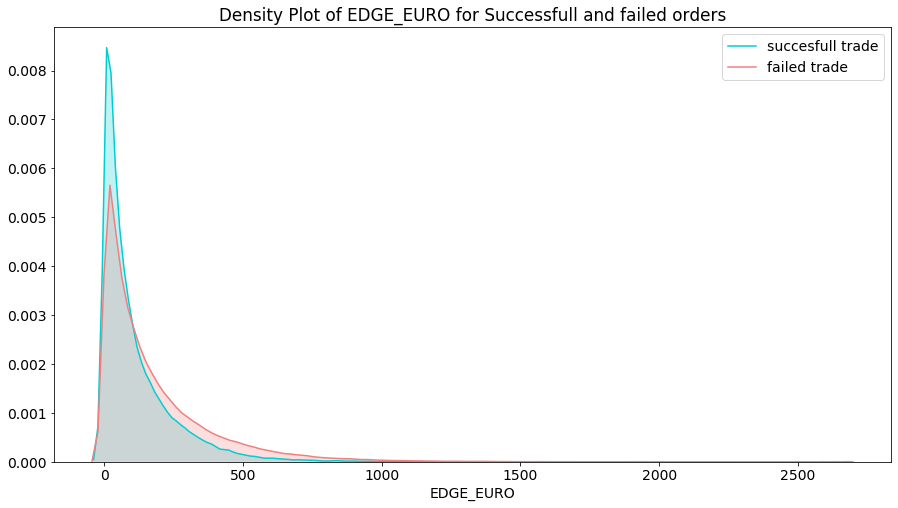

In [185]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(full_data["EDGE_EUR"][full_data.SUCCESS == 1], color="darkturquoise", shade=True)
sns.kdeplot(full_data["EDGE_EUR"][full_data.SUCCESS== 0], color="lightcoral", shade=True)
plt.legend(['succesfull trade', 'failed trade'])
plt.title('Density Plot of EDGE_EURO for Successfull and failed orders')
ax.set(xlabel='EDGE_EURO')
#plt.xlim(-100,300)
plt.show()

# OF SUCCESSFUL TRADES A HIGHER PORTION IS LOWE EDGE EURO

####  Split edge euro into labels

In [562]:
# Split latency into groups
edge_euro_range = full_data.EDGE_EUR.max() - full_data.EDGE_EUR.min()
num_points = 3
bucket_size = edge_euro_range / num_points
print(bucket_size)
buckets = [full_data.EDGE_EUR.min() + i*bucket_size for i in range(num_points+1)]

split_edge_euro = pd.cut(full_data.EDGE_EUR, bins = buckets, include_lowest= True, labels=['low', 'mid', 'high'])

X = full_data.copy()
X["Split_Edge_euro"] = split_edge_euro
print(X.head())

884.5539094024081
   DAY      EDGE    EDGE_EUR  VOLUME  GW  LATENCY  SUCCESS Split_Edge_euro
0    0  0.012786  315.176118      29   2     7623        0             low
1    0  0.006832   87.106944      15   1    32989        0             low
2    0  0.008274  126.599008      18   1     3911        0             low
3    0  0.004841   24.688000       6   2     2674        0             low
4    0  0.000770   11.133152      17   1    27977        0             low


884.5539094024081
   DAY      EDGE    EDGE_EUR  VOLUME  GW  LATENCY  SUCCESS Split_Edge_euro
0    0  0.012786  315.176118      29   2     7623        0             low
1    0  0.006832   87.106944      15   1    32989        0             low
2    0  0.008274  126.599008      18   1     3911        0             low
3    0  0.004841   24.688000       6   2     2674        0             low
4    0  0.000770   11.133152      17   1    27977        0             low
SUCCESS               0      1         %
Split_Edge_euro                         
low              161957  35934  0.181585
mid                1998     81  0.038961
high                 29      1  0.033333
(25,)


Text(0.5, 1.0, 'EDGE_EURO % of success')

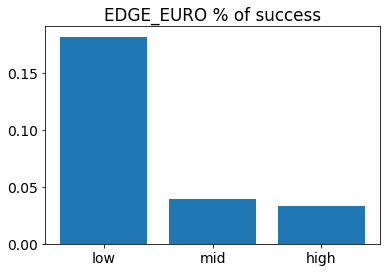

In [563]:
edge_euro_range = full_data.EDGE_EUR.max() - full_data.EDGE_EUR.min()
num_points = 3
bucket_size = edge_euro_range / num_points
print(bucket_size)
buckets = [full_data.EDGE_EUR.min() + i*bucket_size for i in range(num_points+1)]

split_edge_euro = pd.cut(full_data.EDGE_EUR, bins = buckets, include_lowest= True, labels=['low', 'mid', 'high'])

X = full_data.copy()
X["Split_Edge_euro"] = split_edge_euro
print(X.head())

edge_euro_split = X.groupby("Split_Edge_euro").apply(lambda x: x.SUCCESS.value_counts())
new_data = (edge_euro_split.iloc[:,1]) / ((edge_euro_split.iloc[:,1])+ (edge_euro_split.iloc[:,0]))
edge_euro_split.insert(2, "%", new_data,True)
print(edge_euro_split)
print(latency_split.shape)
x = edge_euro_split.iloc[:,2]
plt.bar(edge_euro_split.index, x)
plt.title("EDGE_EURO % of success")

#### Split into intervals

In [1]:

edge_euro_range = full_data.EDGE_EUR.max() - full_data.EDGE_EUR.min()

num_points = 3
bucket_size = edge_euro_range / num_points
print(bucket_size)
buckets = [full_data.EDGE_EUR.min() + i*bucket_size for i in range(num_points+1)]


label  = ["{}".format(buckets[i]) + " - " + "{}".format(buckets[i+1])  for i in range(len(buckets) - 1)]
split_edge_euro = pd.cut(full_data.EDGE_EUR, bins = buckets, include_lowest= True, labels=label)

X = full_data.copy()
X["Split_Edge_euro"] = split_edge_euro
print(X.head())




edge_euro_split_success = X.loc[X.SUCCESS == 1].groupby("Split_Edge_euro").SUCCESS.count() 
edge_euro_split_fail = X.loc[X.SUCCESS == 0].groupby("Split_Edge_euro").SUCCESS.count() 


new_data = edge_euro_split_success / (edge_euro_split_fail + edge_euro_split_success)
print(new_data)
x = new_data
plt.bar(edge_euro_split_success.index, x)
plt.title("Edge_EURO % of success")



NameError: name 'full_data' is not defined

#### EDGE EURO BY GATEWAY

21.48705
Split_Edge_euro
0.0 - 21.48705          0.209268
21.48705 - 42.9741      0.198980
42.9741 - 64.46115      0.190163
64.46115 - 85.9482      0.190856
85.9482 - 107.43525     0.176452
107.43525 - 128.9223    0.164190
128.9223 - 150.40935    0.145133
150.40935 - 171.8964    0.149183
171.8964 - 193.38345    0.145488
193.38345 - 214.8705    0.132856
214.8705 - 236.35755    0.134562
236.35755 - 257.8446    0.130282
257.8446 - 279.33165    0.175258
279.33165 - 300.8187    0.125000
300.8187 - 322.30575    0.128065
322.30575 - 343.7928    0.152466
343.7928 - 365.27985    0.155556
365.27985 - 386.7669    0.125000
386.7669 - 408.25395         NaN
408.25395 - 429.741          NaN
Name: SUCCESS, dtype: float64
Split_Edge_euro
0.0 - 21.48705          0.258974
21.48705 - 42.9741      0.231276
42.9741 - 64.46115      0.224533
64.46115 - 85.9482      0.210855
85.9482 - 107.43525     0.190618
107.43525 - 128.9223    0.172915
128.9223 - 150.40935    0.185864
150.40935 - 171.8964    0.177036
171.8

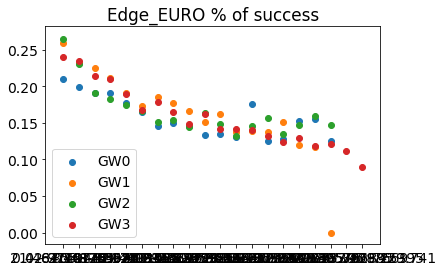

In [558]:

edge_euro_range = full_data.EDGE_EUR.max() - full_data.EDGE_EUR.min()
num_points = 20
bucket_size = latency_range / num_points
print(bucket_size)
buckets = [full_data.EDGE_EUR.min() + i*bucket_size for i in range(num_points+1)]


label  = ["{}".format(buckets[i]) + " - " + "{}".format(buckets[i+1])  for i in range(len(buckets) - 1)]
split_edge_euro = pd.cut(full_data.EDGE_EUR, bins = buckets, include_lowest= True, labels=label)





for i in range(4):
    X = full_data.copy()
    X = X.loc[X.GW == i]
    X["Split_Edge_euro"] = split_edge_euro
    #print(X.head())




    edge_euro_split_success = X.loc[X.SUCCESS == 1].groupby("Split_Edge_euro").SUCCESS.count() 
    edge_euro_split_fail = X.loc[X.SUCCESS == 0].groupby("Split_Edge_euro").SUCCESS.count() 


    new_data = edge_euro_split_success / (edge_euro_split_fail + edge_euro_split_success)
    #print(new_data)
    x = new_data
    plt.scatter(edge_euro_split_success.index, x, label = 'GW%s'%i)
    plt.title("Edge_EURO % of success")
    print(new_data)

plt.legend()
plt.show()



### EDGE VS SUCCESS

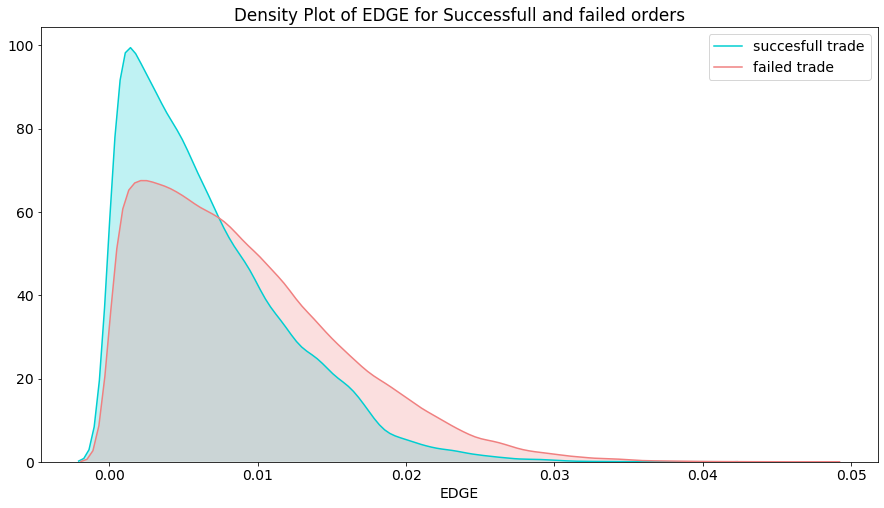

In [189]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(full_data["EDGE"][full_data.SUCCESS == 1], color="darkturquoise", shade=True)
sns.kdeplot(full_data["EDGE"][full_data.SUCCESS== 0], color="lightcoral", shade=True)
plt.legend(['succesfull trade', 'failed trade'])
plt.title('Density Plot of EDGE for Successfull and failed orders')
ax.set(xlabel='EDGE')
#plt.xlim(-100,300)
plt.show()

# LOWER EDGE TRADES ARE MUCH more SUCCESSFUL


### split edge into intervals

0.015767415938432918
   DAY      EDGE    EDGE_EUR  VOLUME  GW  LATENCY  SUCCESS  \
0    0  0.012786  315.176118      29   2     7623        0   
1    0  0.006832   87.106944      15   1    32989        0   
2    0  0.008274  126.599008      18   1     3911        0   
3    0  0.004841   24.688000       6   2     2674        0   
4    0  0.000770   11.133152      17   1    27977        0   

                               Split_Edge_euro  
0  1.002810867125562e-07 - 0.01576751621951963  
1  1.002810867125562e-07 - 0.01576751621951963  
2  1.002810867125562e-07 - 0.01576751621951963  
3  1.002810867125562e-07 - 0.01576751621951963  
4  1.002810867125562e-07 - 0.01576751621951963  
Split_Edge_euro
1.002810867125562e-07 - 0.01576751621951963    0.196211
0.01576751621951963 - 0.03153493215795255      0.085673
0.03153493215795255 - 0.04730234809638546      0.023881
Name: SUCCESS, dtype: float64


Text(0.5, 1.0, 'Edge_EURO % of success')

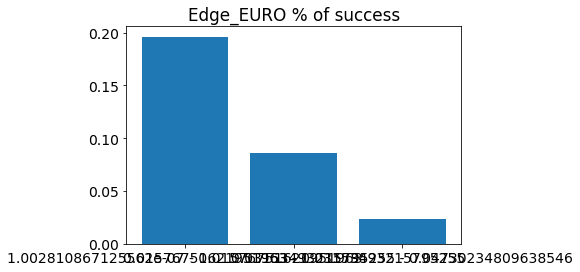

In [568]:

edge_euro_range = full_data.EDGE.max() - full_data.EDGE.min()
num_points = 3
bucket_size = edge_euro_range / num_points
print(bucket_size)
buckets = [full_data.EDGE.min() + i*bucket_size for i in range(num_points+1)]


label  = ["{}".format(buckets[i]) + " - " + "{}".format(buckets[i+1])  for i in range(len(buckets) - 1)]
split_edge_euro = pd.cut(full_data.EDGE, bins = buckets, include_lowest= True, labels=label)

X = full_data.copy()
X["Split_Edge_euro"] = split_edge_euro
print(X.head())




edge_euro_split_success = X.loc[X.SUCCESS == 1].groupby("Split_Edge_euro").SUCCESS.count() 
edge_euro_split_fail = X.loc[X.SUCCESS == 0].groupby("Split_Edge_euro").SUCCESS.count() 


new_data = edge_euro_split_success / (edge_euro_split_fail + edge_euro_split_success)
print(new_data)
x = new_data
plt.bar(edge_euro_split_success.index, x)
plt.title("Edge_EURO % of success")



0.015767415938432918
   DAY      EDGE    EDGE_EUR  VOLUME  GW  LATENCY  SUCCESS  \
0    0  0.012786  315.176118      29   2     7623        0   
1    0  0.006832   87.106944      15   1    32989        0   
2    0  0.008274  126.599008      18   1     3911        0   
3    0  0.004841   24.688000       6   2     2674        0   
4    0  0.000770   11.133152      17   1    27977        0   

                                    Split_Edge  
0  1.002810867125562e-07 - 0.01576751621951963  
1  1.002810867125562e-07 - 0.01576751621951963  
2  1.002810867125562e-07 - 0.01576751621951963  
3  1.002810867125562e-07 - 0.01576751621951963  
4  1.002810867125562e-07 - 0.01576751621951963  


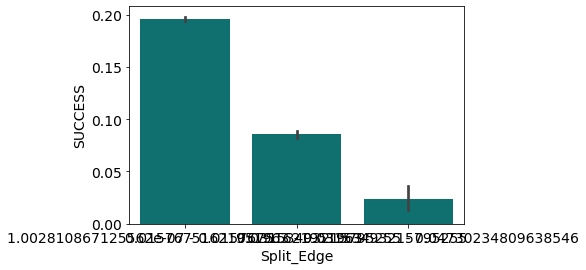

In [573]:
import seaborn as sns
edge_euro_range = full_data.EDGE.max() - full_data.EDGE.min()
num_points = 3
bucket_size = edge_euro_range / num_points
print(bucket_size)
buckets = [full_data.EDGE.min() + i*bucket_size for i in range(num_points+1)]


label  = ["{}".format(buckets[i]) + " - " + "{}".format(buckets[i+1])  for i in range(len(buckets) - 1)]
split_edge_euro = pd.cut(full_data.EDGE, bins = buckets, include_lowest= True, labels=label)

X = full_data.copy()
X["Split_Edge"] = split_edge_euro
print(X.head())



sns.barplot('Split_Edge', 'SUCCESS', data=X, color="teal")
plt.show()


## Models
Sharpe